# Palette

In [1]:
import pandas as pd
import pathlib

from cemba_data.plot import palplot

In [2]:
palette_dir = pathlib.Path('./palette/')

## Brain Region Color

In [3]:
brain_region_table = pd.read_csv('./BrainRegion.txt', sep='\t', index_col=0)
brain_region_table.head()

,RegionName,DissectionRegion,MajorRegion,SubRegion,DetailRegion,PotentialOverlap (MMB),Slice,Anterior (CCF coords),Posterior (CCF coords),MajorRegionColor,SubRegionColor,DissectionRegionColor
Order,,,,,,,,,,,,
13,ACB-1,3F,CNU,ACB,ACB,"EPd,TT,AON,SI,OT",3,3300,3900,#7B42CD,#FFD2FC,#DDD2F4
18,ACB-2,4E,CNU,ACB,ACB,"CP,SI,LSX",4,3900,4500,#7B42CD,#FFD2FC,#FFD2FC
27,ACB-3,5F,CNU,ACB,ACB,"BST,SI,CP",5,4500,5100,#7B42CD,#FFD2FC,#e377c2
17,CP-1,4D,CNU,CP,CP,"ACB,CLA,SSp,AI",4,3900,4500,#7B42CD,#7B42CD,#C87AFD
26,CP-2,5E,CNU,CP,CP,"ACB,BST",5,4500,5100,#7B42CD,#7B42CD,#7B42CD


### Major Region

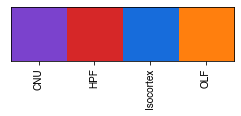

In [4]:
major_region = brain_region_table[['MajorRegion', 'MajorRegionColor']]
major_region.drop_duplicates().to_csv(palette_dir / 'major_region.palette.csv',
                                      header=None,
                                      index=None)
_ = palplot(
    major_region.set_index('MajorRegion')['MajorRegionColor'].to_dict())

### SubRegion 

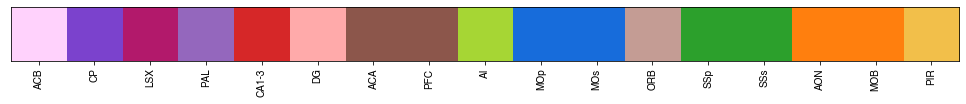

In [5]:
sub_region = brain_region_table[['SubRegion', 'SubRegionColor']]
sub_region.drop_duplicates().to_csv(palette_dir / 'sub_region.palette.csv',
                                    header=None,
                                    index=None)
_ = palplot(sub_region.set_index('SubRegion')['SubRegionColor'].to_dict())

### Dissection Region

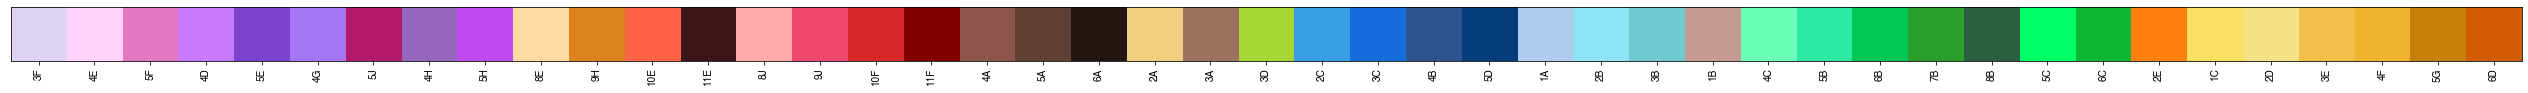

In [6]:
dissectio_region = brain_region_table[[
    'DissectionRegion', 'DissectionRegionColor'
]]
dissectio_region.drop_duplicates().to_csv(palette_dir /
                                          'dissection_region.palette.tsv',
                                          sep='\t',
                                          header=None,
                                          index=None)
_ = palplot(
    dissectio_region.set_index('DissectionRegion')
    ['DissectionRegionColor'].to_dict())

## Cell Type Color

In [7]:
cell_type_table = pd.read_csv('./CellTypeColor.tsv', sep='\t')
cell_type_table.head()

,CellClass,CellClassColor,MajorType,MajorTypeColor,SubType,SubTypeColor
0,NonN,#e06931,ASC,#de9f00,ASC cortex-olf,#f4bd64
1,NonN,#e06931,ASC,#de9f00,ASC mid,#de9f00
2,NonN,#e06931,ASC,#de9f00,ASC str-hpf,#867354
3,NonN,#e06931,ODC,#cea675,ODC odc-large,#4f3900
4,NonN,#e06931,ODC,#cea675,ODC odc-small,#d3a474


## Cell Class Color

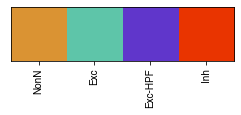

In [8]:
cell_class = cell_type_table[[
    'CellClass', 'CellClassColor'
]].set_index('CellClass')['CellClassColor'].str.upper().drop_duplicates()

cell_class.to_csv(palette_dir / 'cell_class.palette.csv',
                  header=False)
_ = palplot(cell_class.to_dict())

### MajorType

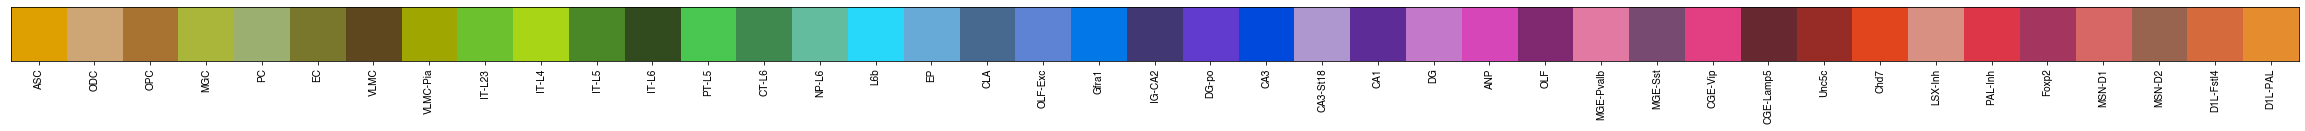

In [9]:
palette = cell_type_table[[
    'MajorType', 'MajorTypeColor'
]].set_index('MajorType')['MajorTypeColor'].str.upper().drop_duplicates()

palette.to_csv(palette_dir / 'major_type.palette.csv',
                  header=False)
_ = palplot(palette.to_dict())

### SubType

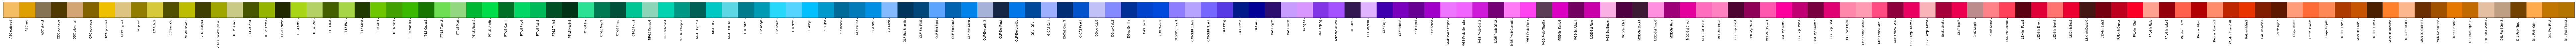

In [10]:
palette = cell_type_table[[
    'SubType', 'SubTypeColor'
]].set_index('SubType')['SubTypeColor'].str.upper().drop_duplicates()

palette.to_csv(palette_dir / 'sub_type.palette.csv',
                  header=False)
_ = palplot(palette.to_dict())

## Concate palette
- For cell browser

In [11]:
pal_files = list(palette_dir.glob('*palette.csv'))

color_total_df = pd.concat(
    [pd.read_csv(path, header=None, names=['name', 'color']) for path in pal_files])
color_total_df.drop_duplicates().to_csv('./palette/total_meta_colors.tsv', index=None, header=None, sep='\t')